# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

## csv 0

In [25]:
df0 = pd.read_csv("0",header=None,delim_whitespace=True)
df0.shape

(3117, 2)

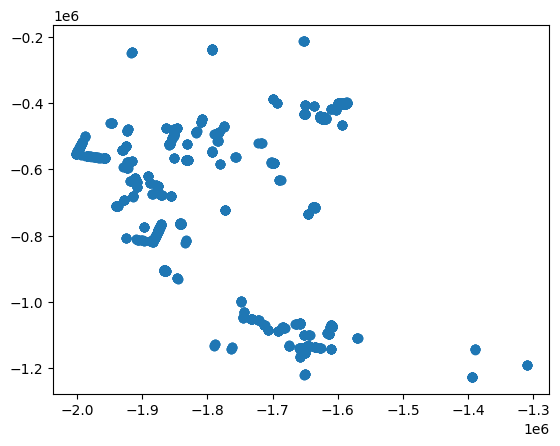

In [26]:
plt.scatter(df0[0], df0[1])
plt.show()

In [27]:
#Check the data, is there a need for any preprocessing?
X0 = df0.to_numpy()

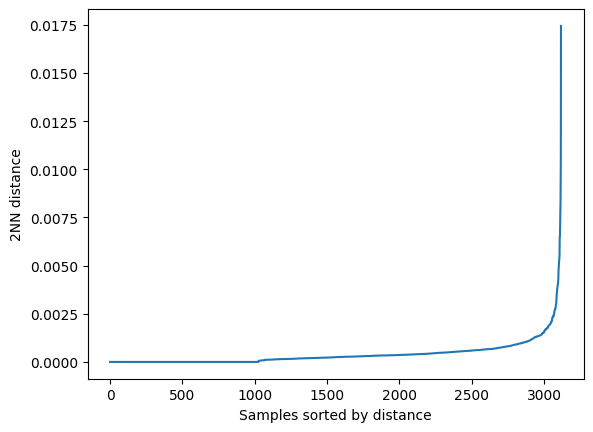

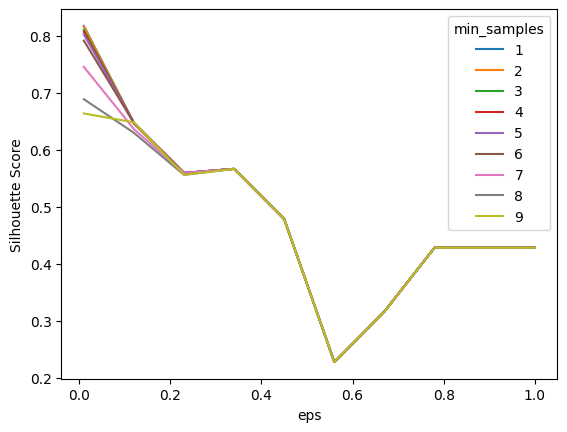

In [28]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#normalize the data making mean 0 and std 1
X0 = StandardScaler().fit_transform(df0)

#use the KNN method in the data to find the distance between every point and its K NN
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X0)
distances, indices = nbrs.kneighbors(X0)

#graph distances vs points with the points ordered from lower to higher
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Samples sorted by distance')
plt.ylabel('2NN distance')
#from this graph I estimate the value of the distances for which the slope change abruptly, that's eps

#calculate the silhouette coefficient for different values of eps and min_samples
silhouette_scores = []
eps_range = np.linspace(0.01, 1, 10)
min_samples_range = range(1, 10)
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X0)
        if len(set(labels)) > 1:
            score = silhouette_score(X0, labels)
            silhouette_scores.append((eps, min_samples, score))
            
            
#graph the silhouette coefficient            
#from this graph I identify the value of min_samples that maximize the silhouette coefficente according to the eps
scores_df = pd.DataFrame(silhouette_scores, columns=["eps", "min_samples", "score"])
scores_pivot = scores_df.pivot(index="eps", columns="min_samples", values="score")
scores_pivot.plot()
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
#plt.xlim([0,0.05])
#plt.ylim([0.81,0.83])
plt.show()

Based on the previous graphs, the correct value of epsilon is $eps = 0,020$, and the min_samples value could be $min\_samples = 3, 4, 5, 6$

In [29]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=0.020, min_samples=4).fit(X0)

In [30]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X0, labels):.3f}")

Estimated number of clusters: 103
Estimated number of noise points: 6
Silhouette Coefficient: 0.823


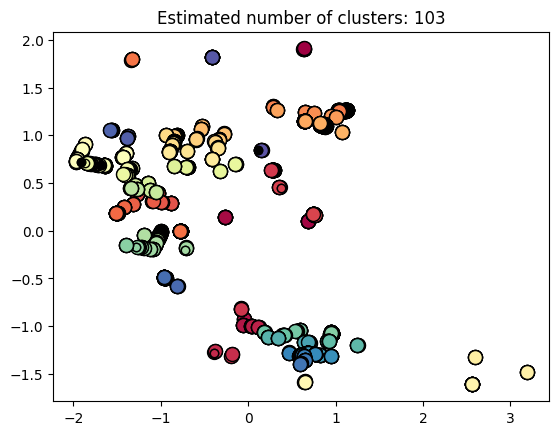

In [31]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X0[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X0[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Nice! Now find the best $\epsilon$ and min_samples for this dataset.  
After that, repeat the process using the 91 and 33 files.

## csv 33

(236896, 2)


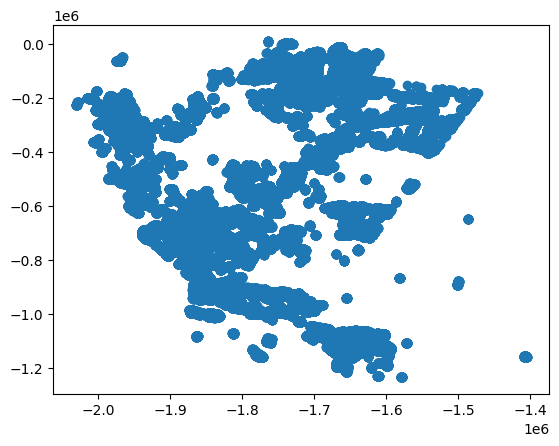

In [4]:
df33 = pd.read_csv("33",header=None,delim_whitespace=True)
print(df33.shape)

#Check the data, is there a need for any preprocessing?
X33 = df33.to_numpy()

plt.scatter(df33[0], df33[1])
plt.show()

KeyboardInterrupt: 

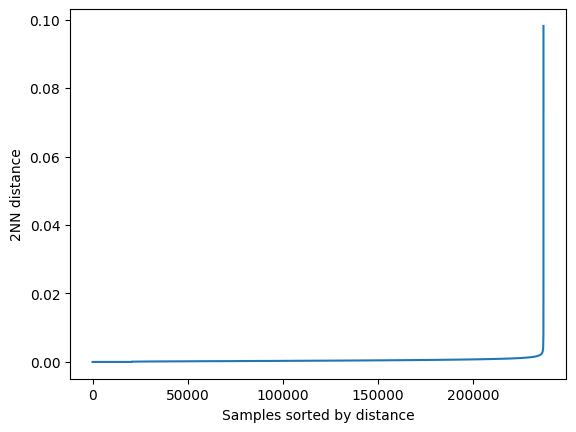

In [32]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#normalize the data making mean 0 and std 1
X33 = StandardScaler().fit_transform(df33)

#use the KNN method in the data to find the distance between every point and its K NN
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X33)
distances, indices = nbrs.kneighbors(X33)

#graph distances vs points with the points ordered from lower to higher
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Samples sorted by distance')
plt.ylabel('2NN distance')
#from this graph I estimate the value of the distances for which the slope change abruptly, that's eps

#calculate the silhouette coefficient for different values of eps and min_samples
silhouette_scores = []
eps_range = np.linspace(0.01, 1, 10)
min_samples_range = range(1, 10)
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X33)
        if len(set(labels)) > 1:
            score = silhouette_score(X33, labels)
            silhouette_scores.append((eps, min_samples, score))
            
            
#graph the silhouette coefficient            
#from this graph I identify the value of min_samples that maximize the silhouette coefficente according to the eps
scores_df = pd.DataFrame(silhouette_scores, columns=["eps", "min_samples", "score"])
scores_pivot = scores_df.pivot(index="eps", columns="min_samples", values="score")
scores_pivot.plot()
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
#plt.xlim([0,0.05])
#plt.ylim([0.81,0.83])
plt.show()

Based on the previous graphs, the correct value of epsilon is $eps = $, and the min_samples value could be $min\_samples = $

In [33]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=0.005, min_samples=5).fit(X33)

In [34]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X33, labels):.3f}")

Estimated number of clusters: 1620
Estimated number of noise points: 520


KeyboardInterrupt: 

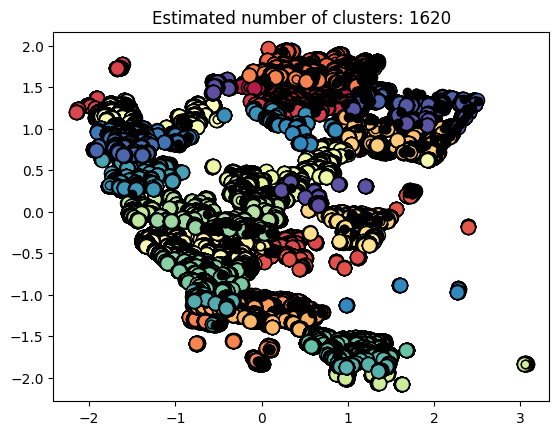

In [35]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X33[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X33[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## csv 91

(636, 2)


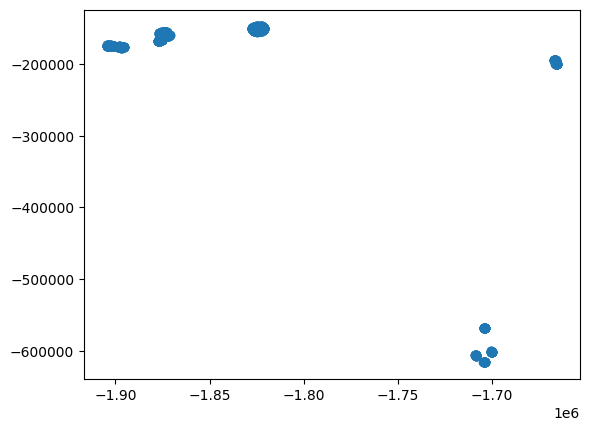

In [5]:
df91 = pd.read_csv("91",header=None,delim_whitespace=True)
print(df91.shape)

#Check the data, is there a need for any preprocessing?
X91 = df91.to_numpy()

plt.scatter(df91[0], df91[1])
plt.show()

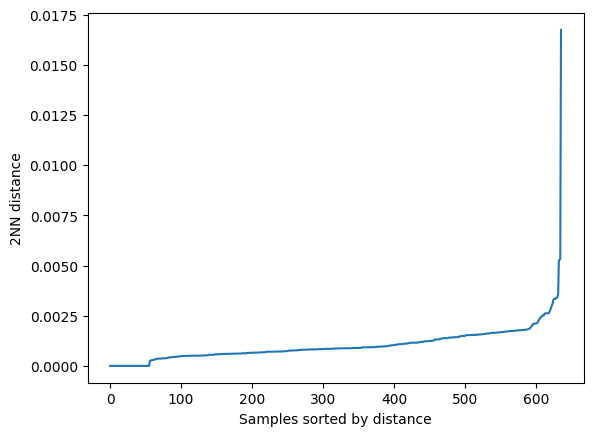

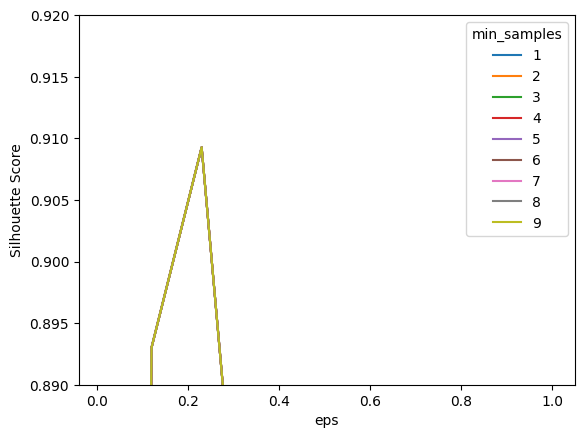

In [10]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#normalize the data making mean 0 and std 1
X91 = StandardScaler().fit_transform(df91)

#use the KNN method in the data to find the distance between every point and its K NN
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X91)
distances, indices = nbrs.kneighbors(X91)

#graph distances vs points with the points ordered from lower to higher
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Samples sorted by distance')
plt.ylabel('2NN distance')
#from this graph I estimate the value of the distances for which the slope change abruptly, that's eps

#calculate the silhouette coefficient for different values of eps and min_samples
silhouette_scores = []
eps_range = np.linspace(0.01, 1, 10)
min_samples_range = range(1, 10)
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X91)
        if len(set(labels)) > 1:
            score = silhouette_score(X91, labels)
            silhouette_scores.append((eps, min_samples, score))
            
            
#graph the silhouette coefficient            
#from this graph I identify the value of min_samples that maximize the silhouette coefficente according to the eps
scores_df = pd.DataFrame(silhouette_scores, columns=["eps", "min_samples", "score"])
scores_pivot = scores_df.pivot(index="eps", columns="min_samples", values="score")
scores_pivot.plot()
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
#plt.xlim([0,0.05])
#plt.ylim([0.89,0.92])
plt.show()

Based on the previous graphs, the correct value of epsilon is $eps = $, and the min_samples value could be $min\_samples = $

In [20]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=0.23, min_samples=9).fit(X91)

In [21]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X91, labels):.3f}")

Estimated number of clusters: 5
Estimated number of noise points: 0
Silhouette Coefficient: 0.909


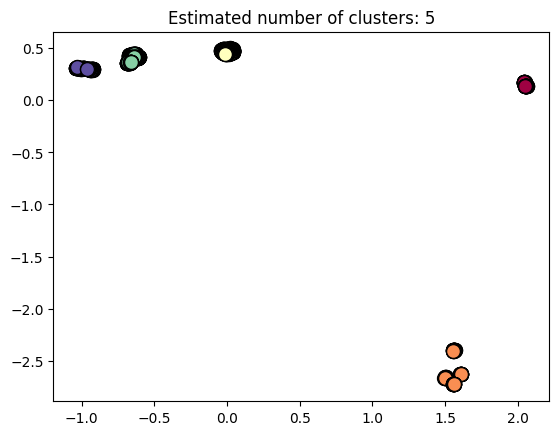

In [22]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X91[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X91[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()